In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [2]:
%%time

data_path = '../data/'

train_origin = pd.read_csv(data_path+'train.csv')
test_origin = pd.read_csv(data_path+'test.csv')
submit_origin = pd.read_csv(data_path+'sample_submission.csv')

CPU times: user 22.9 s, sys: 1.21 s, total: 24.1 s
Wall time: 24.1 s


In [3]:
train = train_origin.copy()
test = test_origin.copy()
submit = submit_origin.copy()

In [4]:
train.shape, test.shape, submit.shape

((1000000, 287), (500000, 286), (500000, 2))

In [5]:
# 결측값 하나도 없음
train_null, test_null = train.isna().sum().sum(), test.isna().sum().sum()
print(f'train na count: {train_null}\ntest na count: {test_null}')

train na count: 0
test na count: 0


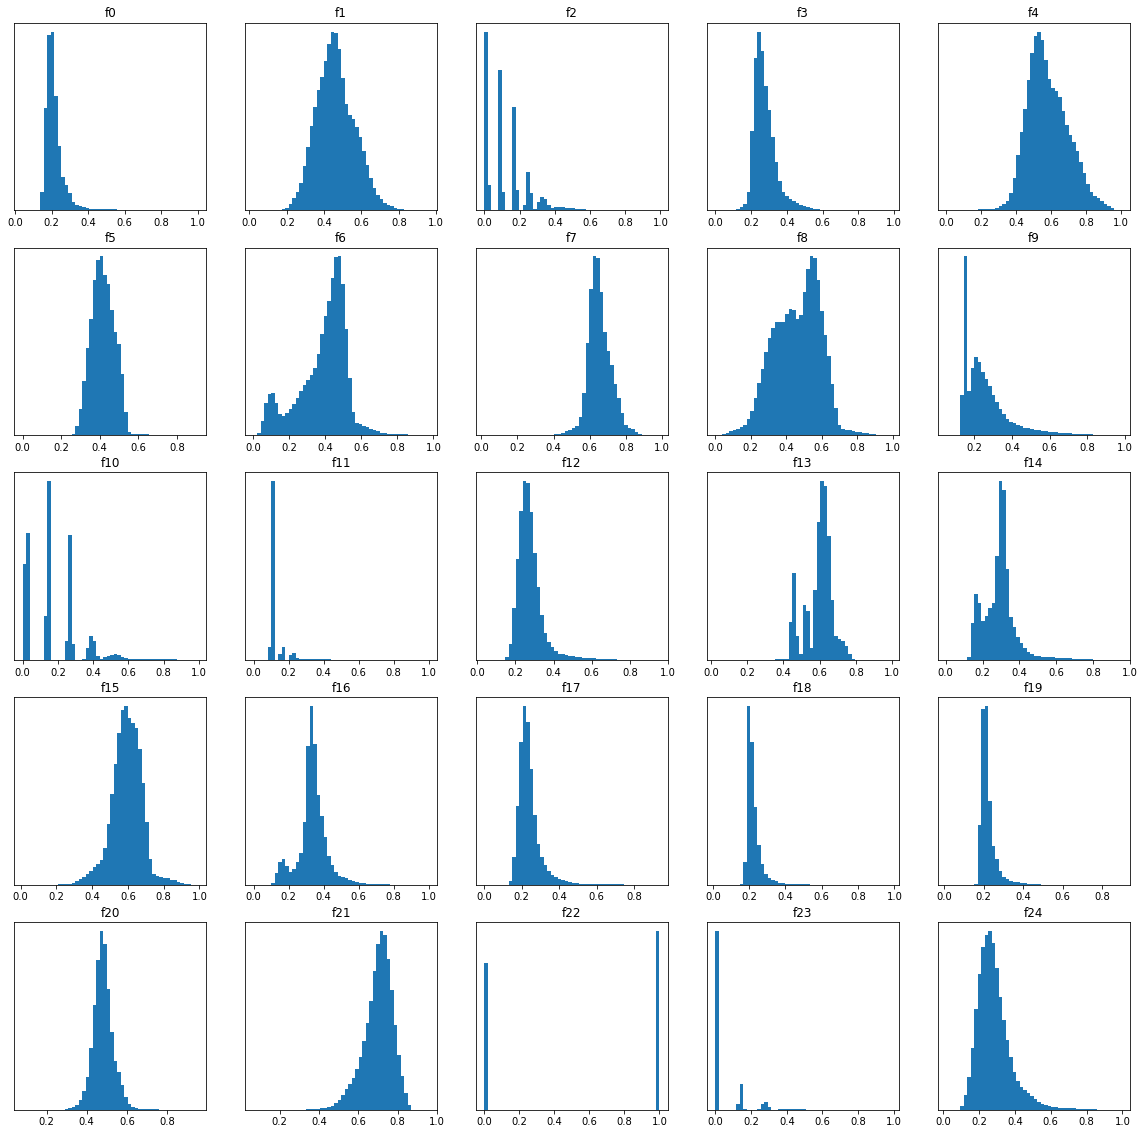

In [6]:
nrow, ncol = 5, 5
fig, ax = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*4))
start_col_index = 1
cols = train.columns.tolist()[start_col_index:start_col_index+25]

for i, col in enumerate(cols):
    ax[i//ncol, i%ncol].hist(train[col], bins=50)
    ax[i//ncol, i%ncol].set_title(col)
    ax[i//ncol, i%ncol].set_yticks([])
    
plt.show()

In [7]:
# binary column이 몇개 존재함
binary_cols = [col for col in train.columns if len(train[col].unique())==2]
print(f'# of binary variables: {len(binary_cols)}')

# of binary variables: 46


In [8]:
# target과 corr이 높은 변수는 f22를 제외하면 거의 존재하지 않음
threshold = 0.05
print(f'corr over {threshold}')
for col in train.columns[1:-1]:
    corr_ = train[[col, 'target']].corr()['target'][0]
    if abs(corr_) > threshold:
        print(f"{col}: {corr_:.05f}")

corr over 0.05
f22: -0.51407
f58: -0.06808
f69: -0.08076
f78: -0.05147
f136: 0.06612
f156: 0.07103
f179: -0.15452
f214: -0.06569


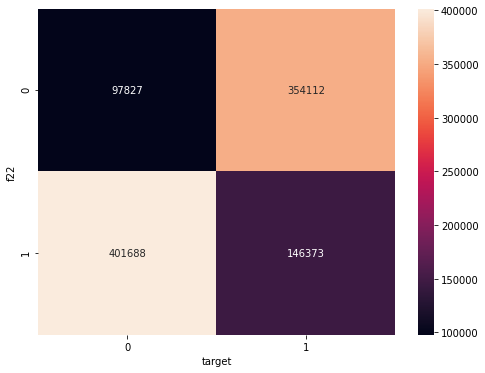

In [9]:
# f22 & target heatmap
df = train.groupby(['f22', 'target'], as_index=False)[['id']].count().pivot('f22', 'target', 'id')

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt='d')
plt.show()

In [10]:
# 전부 0, 1사이로 scaling 되어있음
m, M = train.drop('id', axis=1).min().min(), train.drop('id', axis=1).max().max()
print(f'min: {m}, max: {M}')

min: 0.0, max: 1.0


In [11]:
threshold = 1
skew_under_1 = []
print(f'----- skewness under {threshold} -----')
for col in train.columns[1:-1]:
    skew_ = skew(train[col])
    if abs(skew_) < threshold:
        print(f"{col}: {skew_:.05f}")
        skew_under_1.append(col)

----- skewness under 1 -----
f1: 0.29342
f4: 0.38153
f5: 0.14543
f6: -0.69601
f7: -0.20939
f8: -0.20572
f13: -0.68532
f15: -0.19508
f16: 0.51421
f20: 0.53245
f21: -0.94327
f22: -0.19314
f39: 0.09702
f59: 0.81358
f62: -0.71927
f68: 0.94781
f70: 0.34498
f73: 0.84114
f77: 0.16222
f80: 0.85077
f85: -0.05539
f86: -0.59345
f90: -0.15015
f91: -0.82818
f92: 0.48188
f93: -0.92625
f130: 0.98329
f133: 0.86551
f138: 0.56721
f139: -0.95965
f141: 0.57058
f142: 0.27881
f144: 0.09637
f145: 0.70575
f146: -0.59989
f148: -0.63871
f149: 0.01263
f157: -0.23622
f158: 0.84875
f200: 0.85349
f222: 0.92238
f239: 0.85122
f242: 0.71313
f244: 0.22962
f245: -0.63213
f247: -0.76750
f248: 0.98336
f249: 0.37422
f250: 0.26281
f251: 0.03567
f252: 0.97209
f254: 0.66511
f255: -0.36787
f256: 0.99002
f258: -0.15790
f259: 0.44957
f261: 0.64268
f263: 0.23118
f264: 0.01956
f265: 0.37799
f267: 0.43541
f268: 0.86147
f270: 0.12398
f271: 0.29894
f273: 0.81732
f274: 0.64984


In [12]:
print(f'# of col having skew under 1: {len(skew_under_1)}')

# of col having skew under 1: 66
